# Funciones de distribución de probabilidades

### Distribución uniforme

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a,b,n)

(array([100483.,  99989., 100192., 100173.,  99765.,  99754.,  98985.,
        100410., 100176., 100073.]),
 array([ 1.00003561, 10.90002083, 20.80000606, 30.69999128, 40.59997651,
        50.49996173, 60.39994696, 70.29993218, 80.19991741, 90.09990263,
        99.99988786]),
 <BarContainer object of 10 artists>)

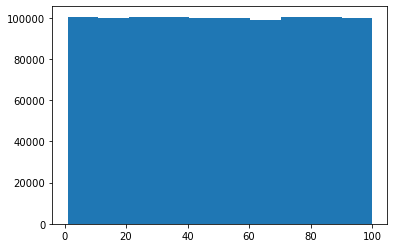

In [14]:
%matplotlib inline
plt.hist(data)